In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [3]:
r = torch.tensor([[.47963206,.598739352,.154963462,.493116352,.384218795,.579867973,.257028457,.320856474,.008668512,.081899588,.024180703,.072795849,.166085727,.334481889,.279321785,.435275282,.262429171,.517632462,.316439148,.44421341]])
r

tensor([[0.4796, 0.5987, 0.1550, 0.4931, 0.3842, 0.5799, 0.2570, 0.3209, 0.0087,
         0.0819, 0.0242, 0.0728, 0.1661, 0.3345, 0.2793, 0.4353, 0.2624, 0.5176,
         0.3164, 0.4442]])

In [4]:
class discriminator(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.disc = nn.Sequential(
            nn.Linear(in_features,64),
            nn.LeakyReLU(.01),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.disc(x)
    
class generator(nn.Module):
    def __init__(self, n_dim, io_dim):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(n_dim,64),
            nn.LeakyReLU(.01),
            nn.Linear(64, io_dim),
        )

    def forward(self, x):
        return self.gen(x)

n_dim = 3 #noise dimension.
io_dim = 20 #generator output and disc input dimension.
lr = 3e-4
num_epoch = 1000
#num_exp = 1000
#batch = 100

disc = discriminator(io_dim)
gen = generator(n_dim, io_dim)

opt_disc = optim.Adam(disc.parameters(), lr=lr)
opt_gen = optim.Adam(gen.parameters(), lr=lr)
criterion = nn.BCELoss()

fixed = torch.randint(0,2,(1,n_dim))
fixed_noise = fixed.float()

z= np.zeros(num_epoch*io_dim)
#z1= np.zeros(num_epoch)
#z2= np.zeros(num_epoch)

d= np.zeros(io_dim*num_epoch)
d1= np.zeros(io_dim*num_epoch)
d2= np.zeros(io_dim*num_epoch)

for ep in range(1):

    for epoch in range(num_epoch):
        #print(epoch)
        for batch in range(500):

            ##Training discriminator
            #conc = torch.Tensor([[10,6,3]])
            #dist = torch.distributions.dirichlet.Dirichlet(conc)
            #data = dist.sample()

            noise = torch.randint(0,2,(1,n_dim))
            noise_f = noise.float()
            fake = gen(noise_f)
            disc_real = disc(r)
            lossD_real = criterion(disc_real, torch.ones_like(disc_real))
            disc_fake = disc(fake)
            lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
            lossD = (lossD_real + lossD_fake) / 2
            disc.zero_grad()
            lossD.backward(retain_graph=True)
            opt_disc.step()


            ##Training generator
            output = disc(fake)
            lossG = criterion(output, torch.ones_like(output))
            gen.zero_grad()
            lossG.backward()
            opt_gen.step()

        generated_samples = gen(noise_f)

        
        #d[epoch] = noise_f[0,0].item()
        #d1[epoch] = noise_f[0,1].item()
        #d2[epoch] = noise_f[0,2].item()



        for ep1 in range(io_dim):
            z[io_dim*epoch + ep1] = generated_samples[0,ep1].item()
            d[io_dim*epoch + ep1] = noise_f[0,0].item()
            d1[io_dim*epoch + ep1] = noise_f[0,1].item()
            d2[io_dim*epoch + ep1] = noise_f[0,2].item()

In [5]:
z

array([0.20194674, 0.83062732, 0.23618363, ..., 0.50858575, 0.31461731,
       0.42226192])

Text(0.5, 1.0, 'Sampled normalized gene expression ratio data (r) from GAN')

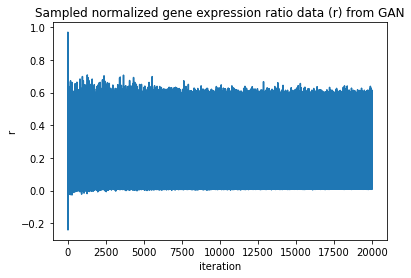

In [15]:
plt.plot(z)
plt.xlabel('iteration')
plt.ylabel('r')
plt.title('Sampled normalized gene expression ratio data (r) from GAN')

In [10]:
Z = z[6000:len(z)]
len(Z)

14000

In [11]:
index = []
for i in range(len(Z)):
    if(Z[i]<0):
        index.append(i)
    
#print(index2)
print("Length of index is",len(index))



Length of index is 0


In [12]:
Z = np.delete(Z,index)

In [13]:
len(Z)

14000

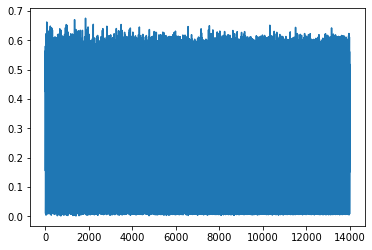

In [15]:
plt.plot(Z)

In [16]:
D = d[6000:len(d)]
D1 = d1[6000:len(d)]
D2 = d2[6000:len(d)]

In [17]:
np.savetxt('re.txt',Z)
np.savetxt('de.txt',D)
np.savetxt('de1.txt',D1)
np.savetxt('de2.txt',D2)


In [18]:
len(Z)

14000